<a href="https://colab.research.google.com/github/assermahmoud99/internship-tasks/blob/main/news_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Downloading the Dataset from Kaggle


*   Here I used KaggleHub to automatically download the AG News dataset.
*   The dataset comes with 2 sepearte files one for training and one for testing.
*   I stored their paths in path_train and path_test for loading it later with pandas.




In [ ]:
import kagglehub

# Download latest version
path_train = kagglehub.dataset_download("amananandrai/ag-news-classification-dataset",path='train.csv')
path_test = kagglehub.dataset_download("amananandrai/ag-news-classification-dataset",path='test.csv')
print("Path to dataset files:", path_train)
print("Path to dataset files:", path_test)

Using Colab cache for faster access to the 'ag-news-classification-dataset' dataset.
Using Colab cache for faster access to the 'ag-news-classification-dataset' dataset.
Path to dataset files: /kaggle/input/ag-news-classification-dataset/train.csv
Path to dataset files: /kaggle/input/ag-news-classification-dataset/test.csv


# 1. Importing Libraries & Loading the Dataset

Here, I imported the required libraries and loaded the training and test sets from the news dataset. To speed up processing while debugging, I limited the size to 10,000 rows for training and 2,000 rows for testing. The data mainly have 120k rows for training and 7.6k for testing but to the time and limitations it got minimized to this amount.







In [ ]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


train_df = pd.read_csv(path_train,nrows=10000) #extracting the data
test_df = pd.read_csv(path_test,nrows=2000)

# 2. Cleaning the Class Labels

I converted the class labels to numeric format to avoid issues during training. Then I printed the class distributions for both training and test sets. This step helps ensure that the dataset is balanced across the four categories: World, Sports, Business, Sci/Tech.




In [ ]:
train_df['Class Index'] = pd.to_numeric(train_df['Class Index'], errors='coerce')
test_df['Class Index'] = pd.to_numeric(test_df['Class Index'], errors='coerce')
print(train_df['Class Index'].value_counts())
print(test_df['Class Index'].value_counts())

Class Index
4    2662
1    2523
3    2477
2    2338
Name: count, dtype: int64
Class Index
2    526
4    514
1    511
3    449
Name: count, dtype: int64


# 3. Text Cleaning with spaCy

I used spaCy for preprocessing:

*   Removed punctuation and stopwords (like “the”, “is”).

*   Lemmatized words (e.g., running → run).
*   Lowercased everything.


This ensures the text is in a consistent format and reduces noise before vectorization.


In [ ]:

nlp = spacy.load('en_core_web_sm')
tokens = []
def clean_text(news):
  doc = nlp(news)
  tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
  return " ".join(tokens)
train_df['Description'] = train_df['Description'].astype(str).apply(clean_text)
train_df['Description'].head(10)


,Description
0,reuters short seller wall street ultra cynic s...
1,reuters private investment firm carlyle reputa...
2,reuters soar crude price plus economy outlook ...
3,reuters authorities halt oil main pipeline sou...
4,afp tearaway world oil price topple record str...
5,reuters stocks end slightly high stay near low...
6,ap assets nation retail money market mutual fu...
7,retail sale bounce bit july new claim jobless ...
8,earn sociology danny bazil riley start work ge...
9,new york reuters short seller wall street dwin...


# 4. TF-IDF Vectorization and Logistic Regression

I transformed the text into numerical features using TF-IDF with up to 20,000 features and both unigrams and bigrams. Then I trained a Logistic Regression classifier on the training data. Finally, I evaluated the model using:

*   Confusion matrix
*   Accuracy score
*   Classification report (precision, recall, F1-score)

This gives a full view of how well the model distinguishes between the four news categories.

In [ ]:
vecotrizer = TfidfVectorizer(stop_words='english',max_features=20000,ngram_range=(1,2))
X_train = vecotrizer.fit_transform(train_df['Description'])
X_test = vecotrizer.transform(test_df['Description'])
lr = LogisticRegression()
lr.fit(X_train, train_df['Class Index'])
y_pred = lr.predict(X_test)
print(lr.coef_)
print(confusion_matrix(test_df['Class Index'], y_pred))
print(accuracy_score(test_df['Class Index'], y_pred))
print(classification_report(test_df['Class Index'], y_pred))

[[-0.06925728 -0.0311153  -0.27621508 ... -0.12171879 -0.08104638
  -0.05289971]
 [ 0.2054284  -0.02449159  0.6239462  ...  0.08023982  0.17722896
   0.11938902]
 [-0.07107989 -0.06688352 -0.17275855 ...  0.14657394 -0.04058947
  -0.02440152]
 [-0.06509123  0.12249041 -0.17497257 ... -0.10509497 -0.05559311
  -0.04208779]]
[[438  24  25  24]
 [ 15 494   4  13]
 [ 38   3 337  71]
 [ 24  13  31 446]]
0.8575
              precision    recall  f1-score   support

           1       0.85      0.86      0.85       511
           2       0.93      0.94      0.93       526
           3       0.85      0.75      0.80       449
           4       0.81      0.87      0.84       514

    accuracy                           0.86      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.86      0.86      2000



# 5. Bonus: Visualizing the Most Important Words per Class

For the bonus part, I extracted the top predictive words for each class based on Logistic Regression coefficients. These bar plots show which words the model finds most useful when deciding whether a headline belongs to World, Sports, Business, or Sci/Tech.

This adds interpretability, showing not just the accuracy but also why the model makes its predictions.








[[-0.06925728 -0.0311153  -0.27621508 ... -0.12171879 -0.08104638
  -0.05289971]
 [ 0.2054284  -0.02449159  0.6239462  ...  0.08023982  0.17722896
   0.11938902]
 [-0.07107989 -0.06688352 -0.17275855 ...  0.14657394 -0.04058947
  -0.02440152]
 [-0.06509123  0.12249041 -0.17497257 ... -0.10509497 -0.05559311
  -0.04208779]] ['aaa' 'aapl' 'aaron' ... 'zurich' 'zvonareva' 'zvonareva final']


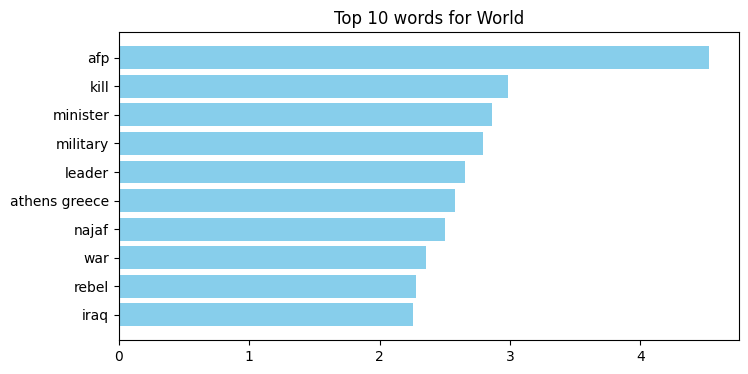

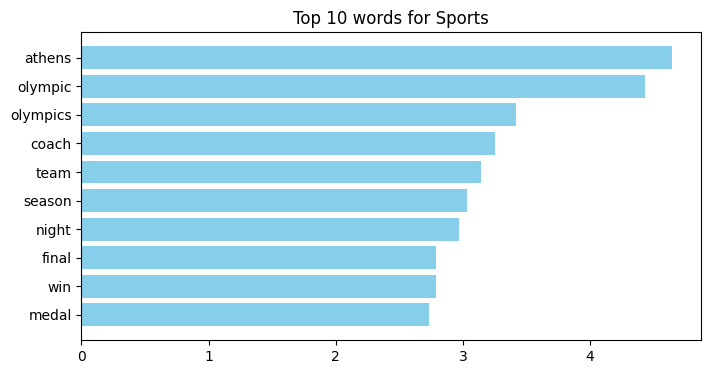

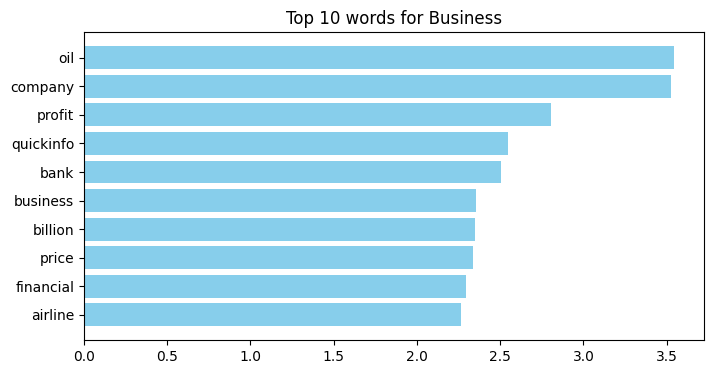

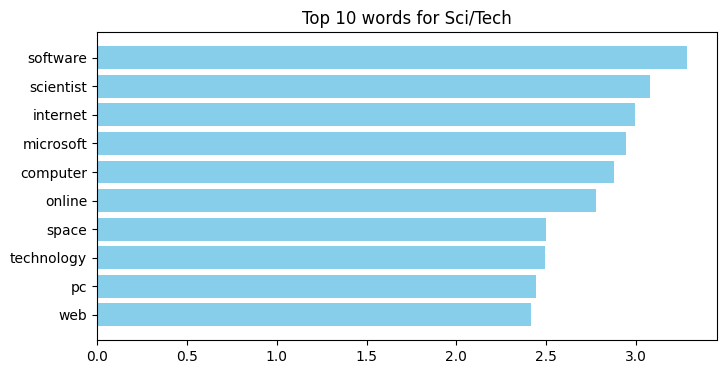

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

feature_names = vecotrizer.get_feature_names_out()
coeffs = lr.coef_
print(coeffs,feature_names)
def plot_top_words(class_idx,class_name, n=10):
    top_indices = np.argsort(coeffs[class_idx])[-n:]
    words = [feature_names[i] for i in top_indices]
    weights = coeffs[class_idx][top_indices]

    plt.figure(figsize=(8,4))
    plt.barh(words, weights, color="skyblue")
    plt.title(f"Top {n} words for {class_name}")
    plt.show()

plot_top_words(0, "World")
plot_top_words(1, "Sports")
plot_top_words(2, "Business")
plot_top_words(3, "Sci/Tech")
